<a href="https://colab.research.google.com/github/saileepanchbhai/Advance-Machine-Learning-Lab/blob/main/Agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [ ]:
#Importing files from local device
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving wine.csv to wine (4).csv
User uploaded file "wine (4).csv" with length 10890 bytes


In [ ]:
# Load the Iris dataset
df = pd.read_csv('wine.csv')

In [ ]:
# Read the first five rows of the data
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Getting info of how many categories are there in the column Wine
df['Wine'].unique()

array([1, 2, 3])

In [ ]:
# count how many times each category appears
df['Wine'].value_counts()

,count
Wine,
2,71
1,59
3,48


In [ ]:
# Extract Wine class labels from the DataFrame
# and store it in 'true_labels' for evaluation purposes.
true_labels = df['Wine']

In [ ]:
# Remove the 'Wine' column (target variable) from the DataFrame
df = df.drop('Wine',axis=1)

In [ ]:
# checking whether the Wine column is still there or not
df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
 # Import MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Create an object of MinMaxScaler to normalize the data

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#Apply Min-Max normalization to scale all feature values between 0 and 1
# Convert the scaled NumPy array back into a pandas DataFrame
# Preserve original column names using columns=df.columns

df.head()
# Display the first 5 rows of the scaled dataset

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


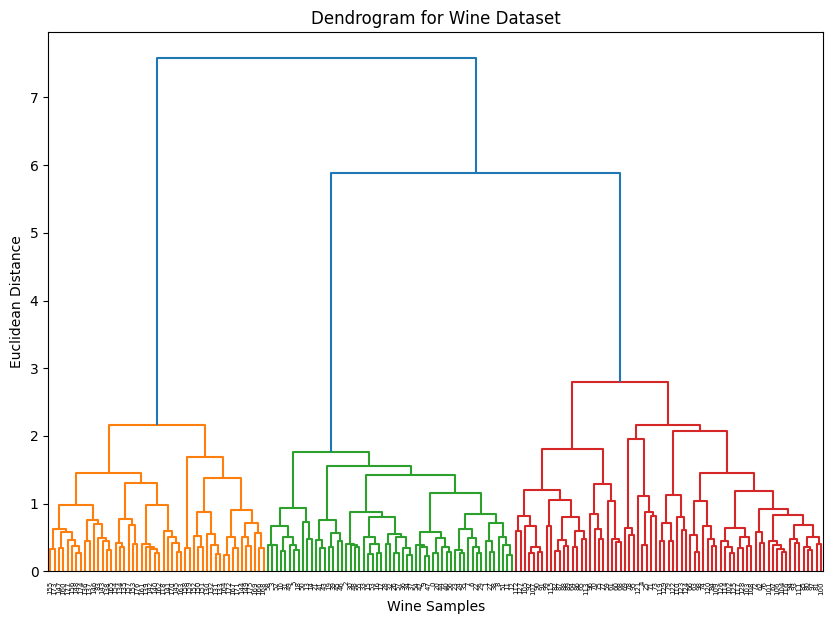

In [ ]:
import scipy.cluster.hierarchy as shc  # Import hierarchical clustering library
plt.figure(figsize=(10, 7)) # Create a figure with specified width and height
plt.title("Dendrogram for Wine Dataset")

dend = shc.dendrogram(shc.linkage(df, method='ward'))
# Compute hierarchical clustering using Ward linkage method
# and generate the dendrogram.

plt.xlabel("Wine Samples")
plt.ylabel("Euclidean Distance")
plt.show()

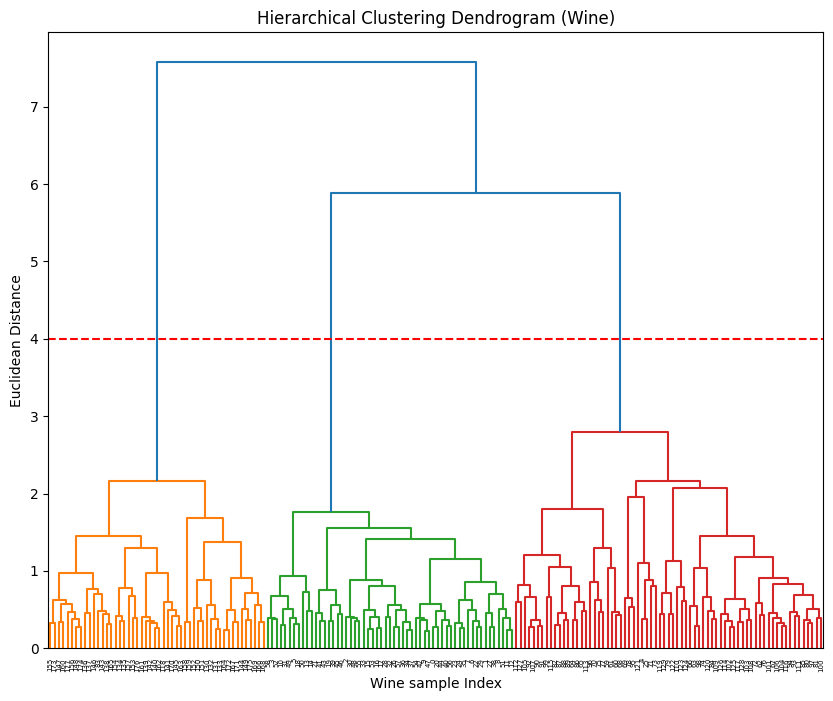

In [ ]:
plt.figure(figsize=(10,8))
# Create a figure with width=10 and height=8
plt.title('Hierarchical Clustering Dendrogram (Wine)')
plt.xlabel('Wine sample Index')
plt.ylabel('Euclidean Distance')
den=shc.dendrogram(shc.linkage(df,method='ward'))
plt.axhline(y=4,color='r',linestyle='--')
# Draw a horizontal red dashed line at distance = 4
# This line represents the cut-off point to determine number of clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
# Number of clusters to form (Wine dataset naturally has 3 classes)
# Ward linkage minimizes within-cluster variance
labels_=cluster.fit_predict(df)
# Fit the model on the feature dataset 'df'
# and assign a cluster label to each wine sample

In [ ]:
labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:

labels = pd.Series(labels_).value_counts()
# Convert the cluster labels array into a pandas Series
# and count the number of samples in each cluster

labels

,count
0,71
2,57
1,50


In [ ]:
# Import Normalized Mutual Information (NMI) metric
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(true_labels, labels_)
# Compare the true class labels (true_labels)
# with the predicted cluster labels (labels_)
# NMI measures similarity between the two label assignments

print("Normalized Mutual Information:", nmi)

Normalized Mutual Information: 0.9086408950328255
